In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Lenovo\PycharmProjects\AI_digital_wallet\ml_model\creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
df["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [8]:
fraud_percentage = df["Class"].mean() * 100
print(f"Fraud transactions: {fraud_percentage:.2f}%")

Fraud transactions: 0.17%


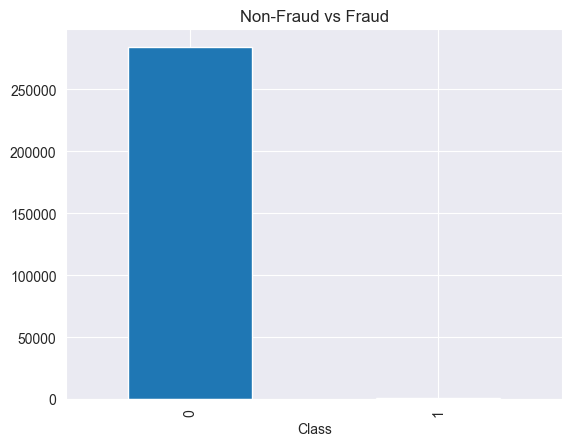

In [9]:
import matplotlib.pyplot as plt

df["Class"].value_counts().plot(kind="bar")
plt.title("Non-Fraud vs Fraud")
plt.show()

In [10]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
df[df["Class"] == 1]["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

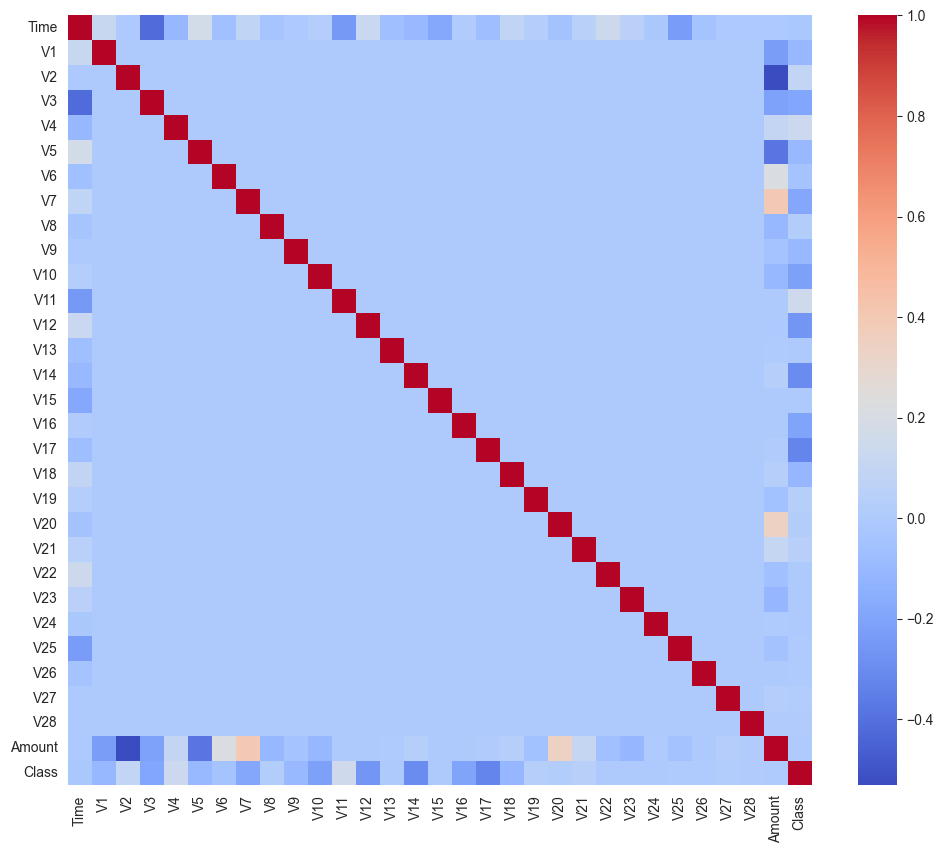

In [12]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

In [13]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [16]:
num_samples = X_train.shape[0]
print(num_samples)

227845


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train["Amount"] = scaler.fit_transform(X_train[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])

Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_probs = rf.predict_proba(X_test)[:, 1]
y_pred_custom = (y_probs > 0.3).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_custom))


[[56861     3]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [42]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

y_probs = rf.predict_proba(X_test)[:, 1]

roc_score = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_score)

precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

ROC-AUC: 0.9571890288895525
PR-AUC: 0.8622783399405825


Random Forest + SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

rf_sm = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = rf_sm.predict(X_test)
y_prob_sm = rf_sm.predict_proba(X_test)[:, 1]

In [45]:
print("RF + SMOTE")
print(classification_report(y_test, y_pred_sm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_sm))

RF + SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9832555190759478


XGBclassifier

In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]),
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [48]:
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9694119804646676


Comparing Different model Performance

In [49]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("="*50)
    print(f"{model_name}")
    print("="*50)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print("\n\n")


# Evaluate all three
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(rf_sm, X_test, y_test, "Random Forest + SMOTE")
evaluate_model(xgb, X_test, y_test, "XGBoost")

Random Forest
Confusion Matrix:
[[56861     3]
 [   24    74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9571890288895525



Random Forest + SMOTE
Confusion Matrix:
[[56847    17]
 [   18    80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9832555190759478



XGBoost
Confusion Matrix:
[[56854    10]
 [   15    83]]

Classification Report:
              precisi

In [52]:
xgb.save_model("xgb_fraud_model.json")